C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\1225263288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\1225263288.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\1225263288.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


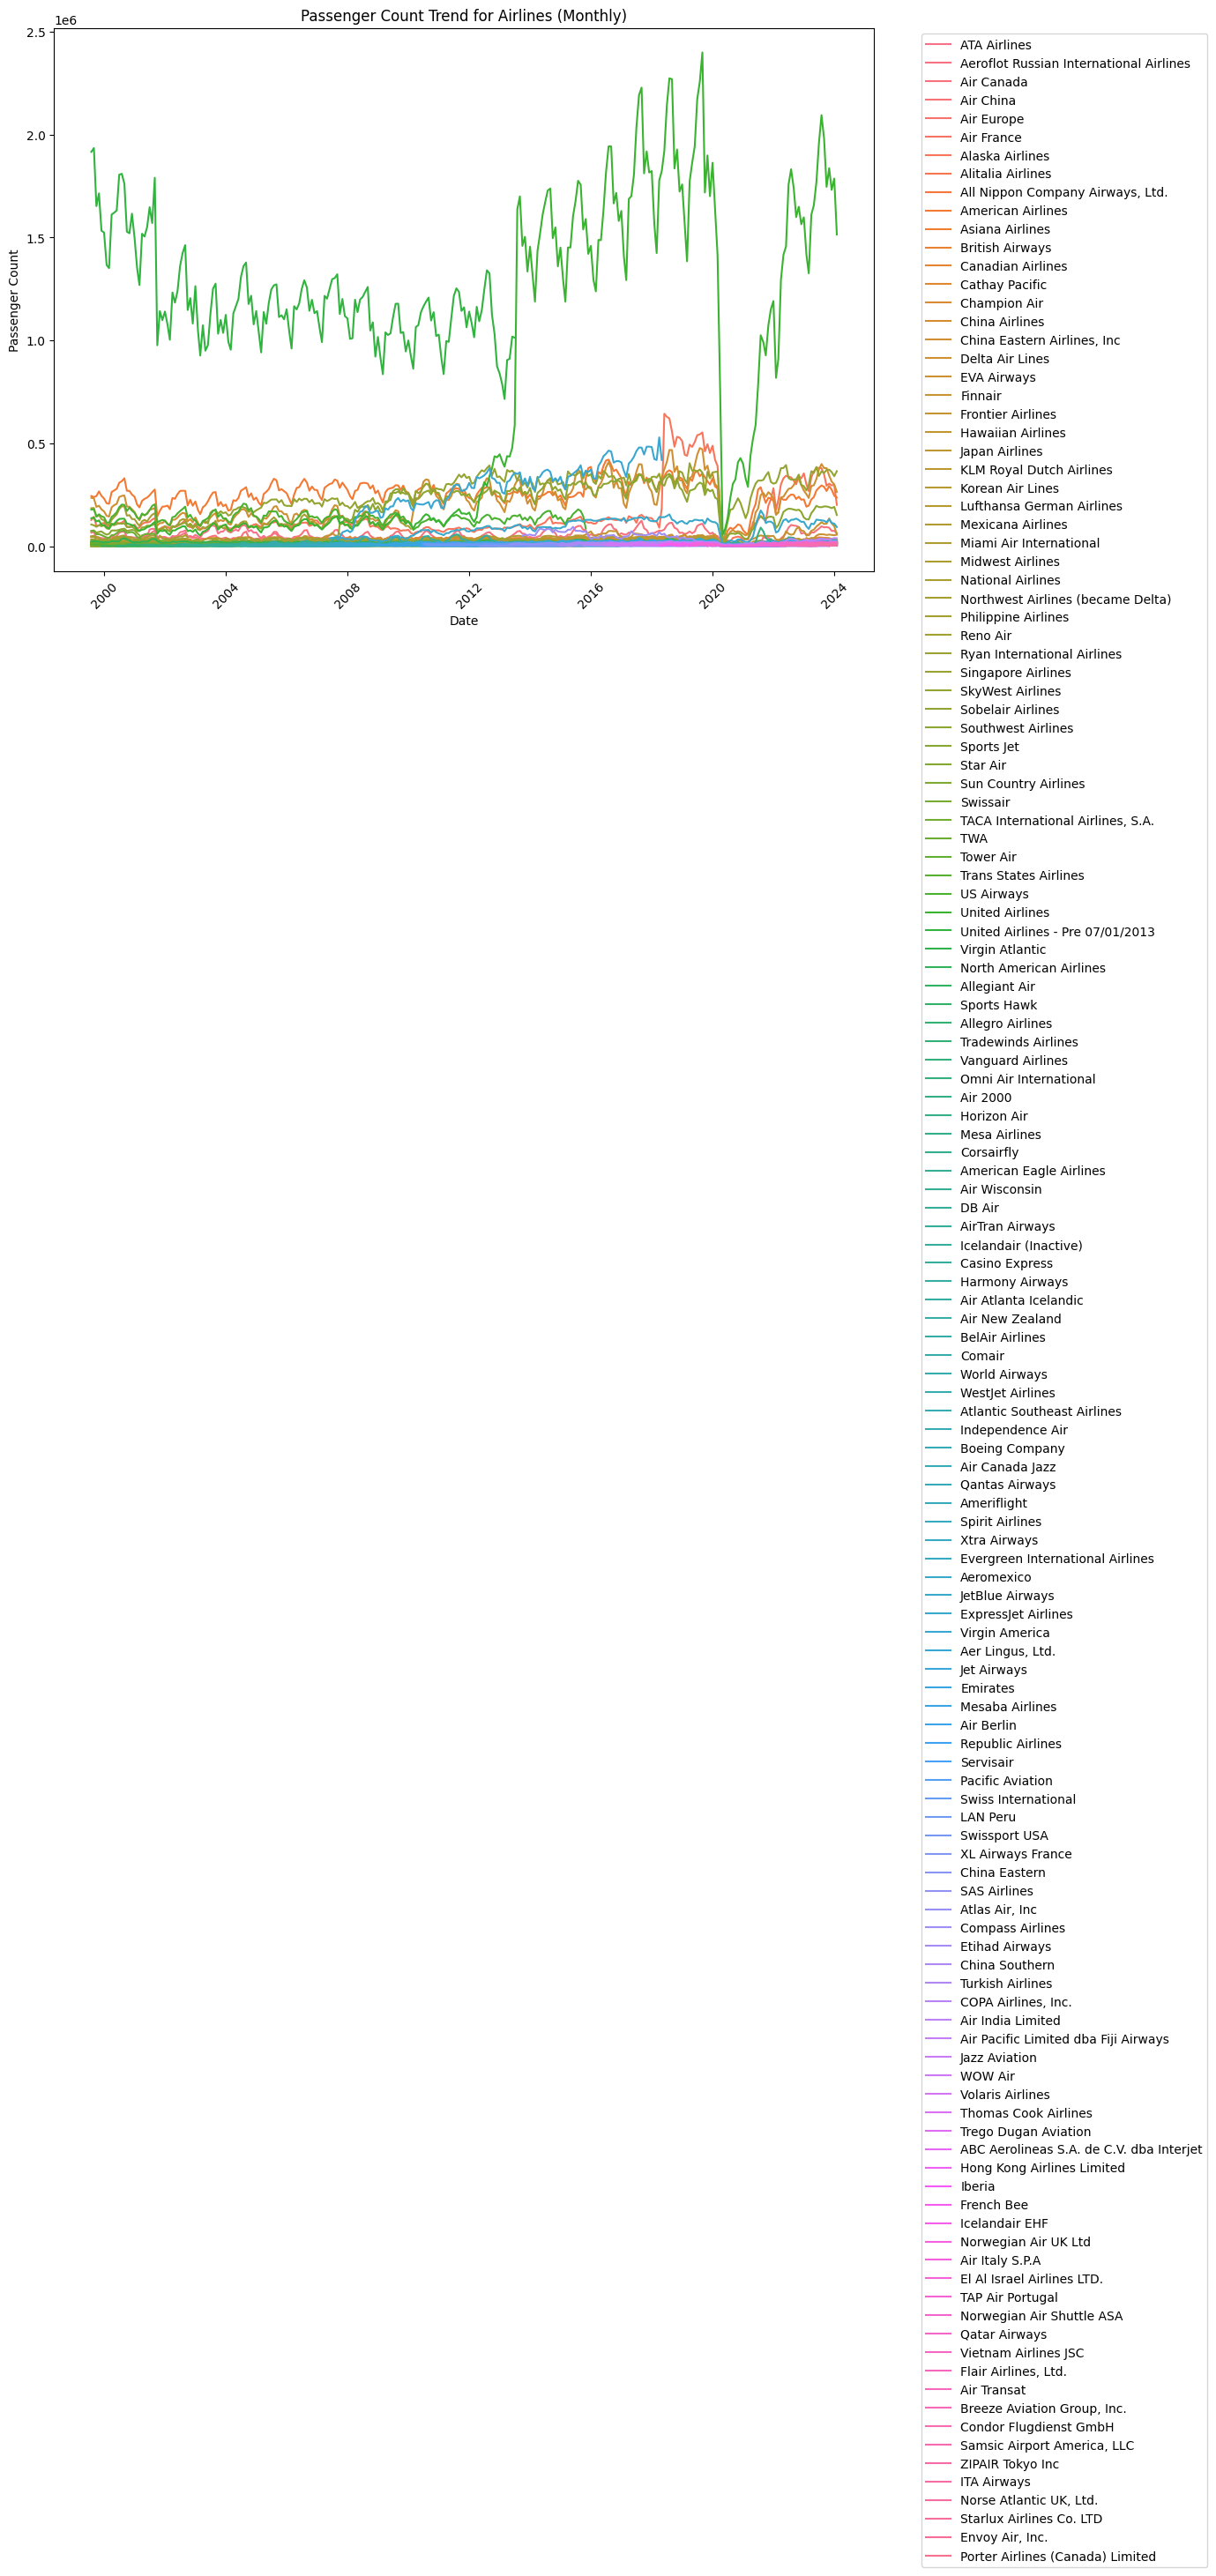

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and month, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()

# Line chart showing passenger count trend for each airline every month
plt.figure(figsize=(12, 8))
sns.lineplot(data=airline_passenger_counts, x='Activity Period Start Date', y='Passenger Count', hue='Operating Airline')
plt.title('Passenger Count Trend for Airlines (Monthly)')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\2362406971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_14672\2362406971.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()


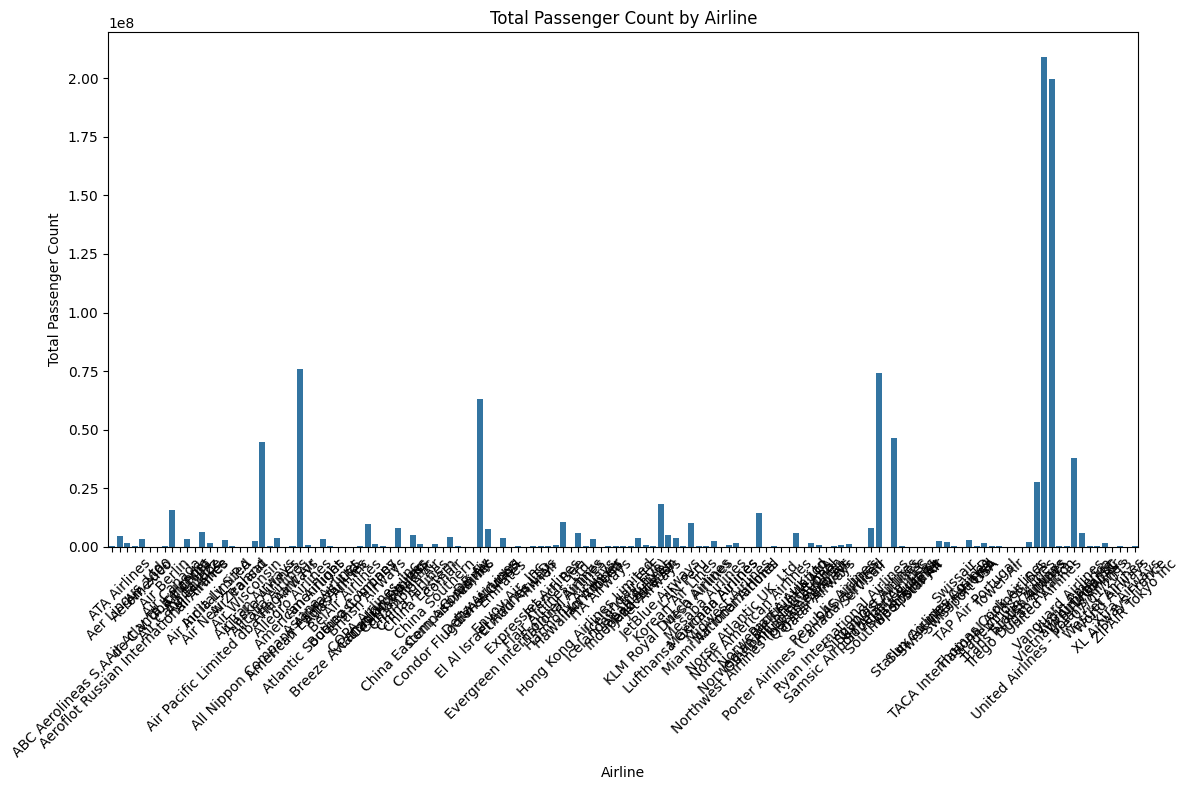

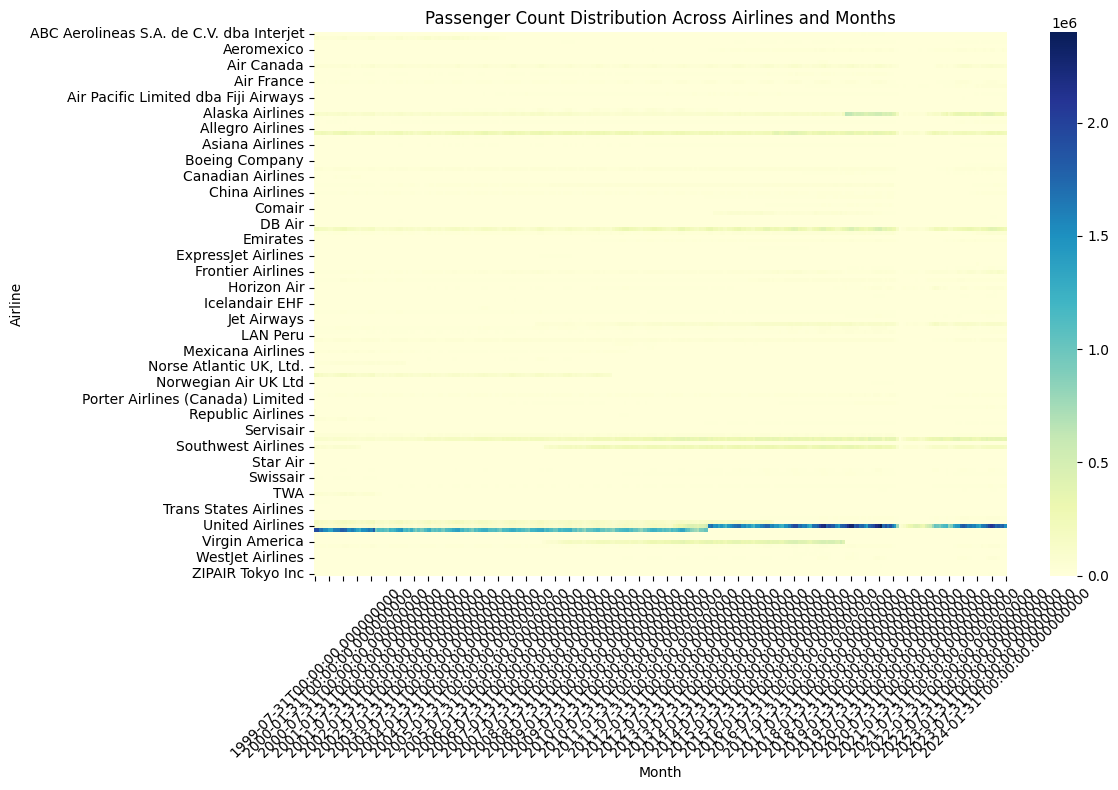

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and month, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()

# Bar plot to compare total passenger count for each airline
plt.figure(figsize=(12, 8))
total_passenger_count = airline_passenger_counts.groupby('Operating Airline')['Passenger Count'].sum().reset_index()
sns.barplot(data=total_passenger_count, x='Operating Airline', y='Passenger Count')
plt.title('Total Passenger Count by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap to visualize passenger count distribution across airlines and months
pivot_table = airline_passenger_counts.pivot_table(index='Operating Airline', columns='Activity Period Start Date', values='Passenger Count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Passenger Count Distribution Across Airlines and Months')
plt.xlabel('Month')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\2437993438.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\2437993438.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()
C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\2437993438.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_airline_passenger_counts, x='Oper

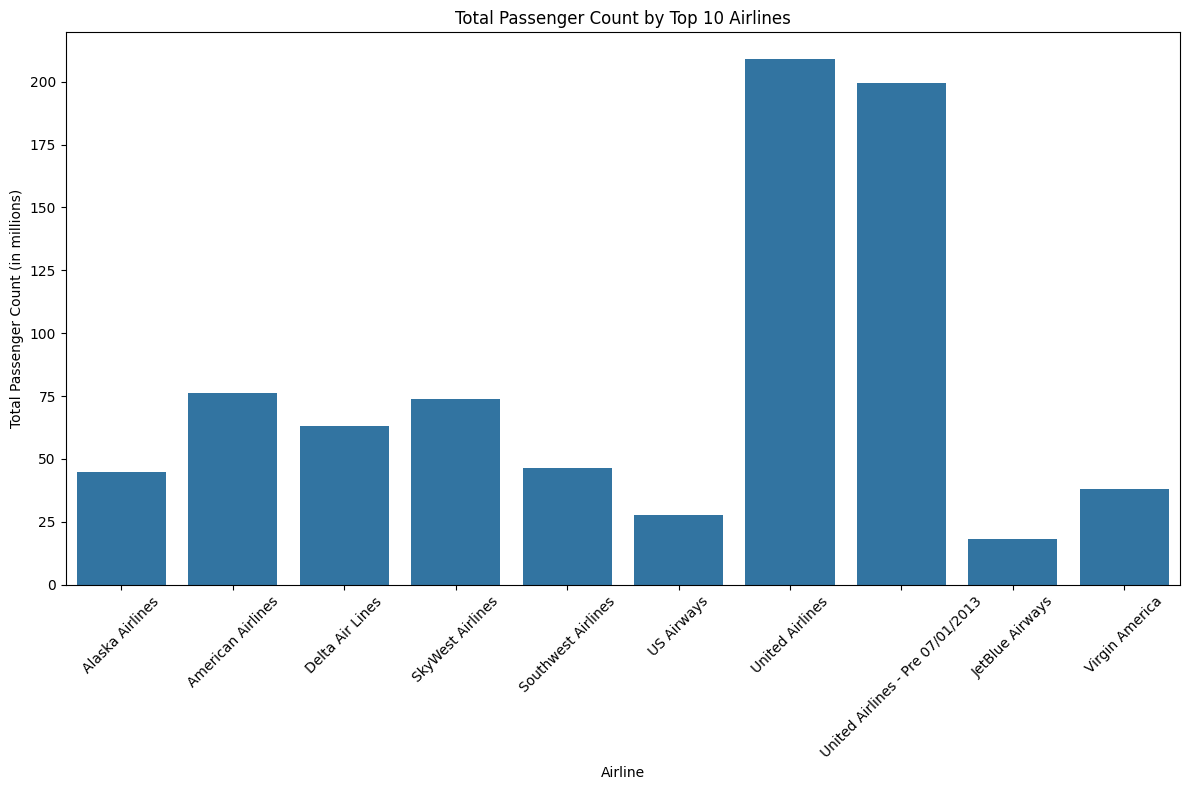

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and month, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='M'), 'Operating Airline']).sum().reset_index()

# Calculate total passenger count for each airline
total_passenger_count = airline_passenger_counts.groupby('Operating Airline')['Passenger Count'].sum().reset_index()

# Filter the top 10 airlines with the highest total passenger counts
top_10_airlines = total_passenger_count.nlargest(10, 'Passenger Count')['Operating Airline']

# Filter the dataset to include only the top 10 airlines
filtered_airline_passenger_counts = airline_passenger_counts[airline_passenger_counts['Operating Airline'].isin(top_10_airlines)]


# Function to format y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Bar plot to compare total passenger count for each of the top 10 airlines
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=filtered_airline_passenger_counts, x='Operating Airline', y='Passenger Count', estimator=sum, ci=None)
plt.title('Total Passenger Count by Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Total Passenger Count (in millions)')
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()

# Save the plot in a PDF file
plt.savefig('images/airline_passenger_counts.png', format='png')

plt.show()


C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\2931982643.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])
C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\2931982643.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='Y'), 'Operating Airline']).sum().reset_index()


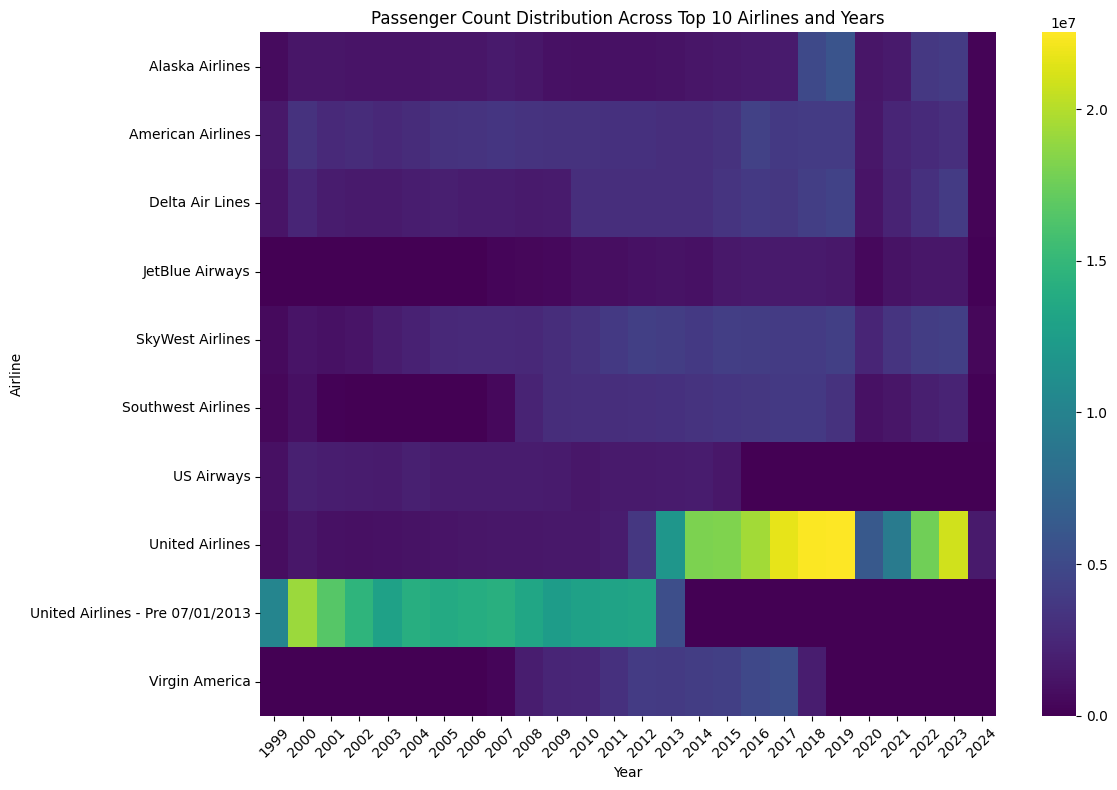

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Select relevant columns
airline_data = data[['Activity Period Start Date', 'Operating Airline', 'Passenger Count']]

# Convert 'Activity Period Start Date' to datetime
airline_data['Activity Period Start Date'] = pd.to_datetime(airline_data['Activity Period Start Date'])

# Group data by airline and year, summing passenger counts
airline_passenger_counts = airline_data.groupby([pd.Grouper(key='Activity Period Start Date', freq='Y'), 'Operating Airline']).sum().reset_index()

# Calculate total passenger count for each airline
total_passenger_count = airline_passenger_counts.groupby('Operating Airline')['Passenger Count'].sum().reset_index()

# Filter the top 10 airlines with the highest total passenger counts
top_10_airlines = total_passenger_count.nlargest(10, 'Passenger Count')['Operating Airline']

# Filter the dataset to include only the top 10 airlines
filtered_airline_passenger_counts = airline_passenger_counts[airline_passenger_counts['Operating Airline'].isin(top_10_airlines)]

# Pivot the data to create a matrix for the heatmap
pivot_table = filtered_airline_passenger_counts.pivot_table(index='Operating Airline', columns='Activity Period Start Date', values='Passenger Count', aggfunc='sum', fill_value=0)
pivot_table.columns = pivot_table.columns.year

# Heatmap to visualize passenger count distribution across the top 10 airlines and years
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Passenger Count Distribution Across Top 10 Airlines and Years')
plt.xlabel('Year')
plt.ylabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
# Filter the data for the year 2023
airlines_2023 = airline_data[airline_data['Activity Period Start Date'].dt.year == 2023]

# Count the unique airlines
num_airlines_2023 = airlines_2023['Operating Airline'].nunique()

print(f'The number of airlines operating in 2023 is {num_airlines_2023}.')

The number of airlines operating in 2023 is 56.


In [3]:
# Count the unique airlines in the entire dataset
total_num_airlines = airline_data['Operating Airline'].nunique()

print(f'The total number of unique airlines in the dataset is {total_num_airlines}.')

The total number of unique airlines in the dataset is 137.


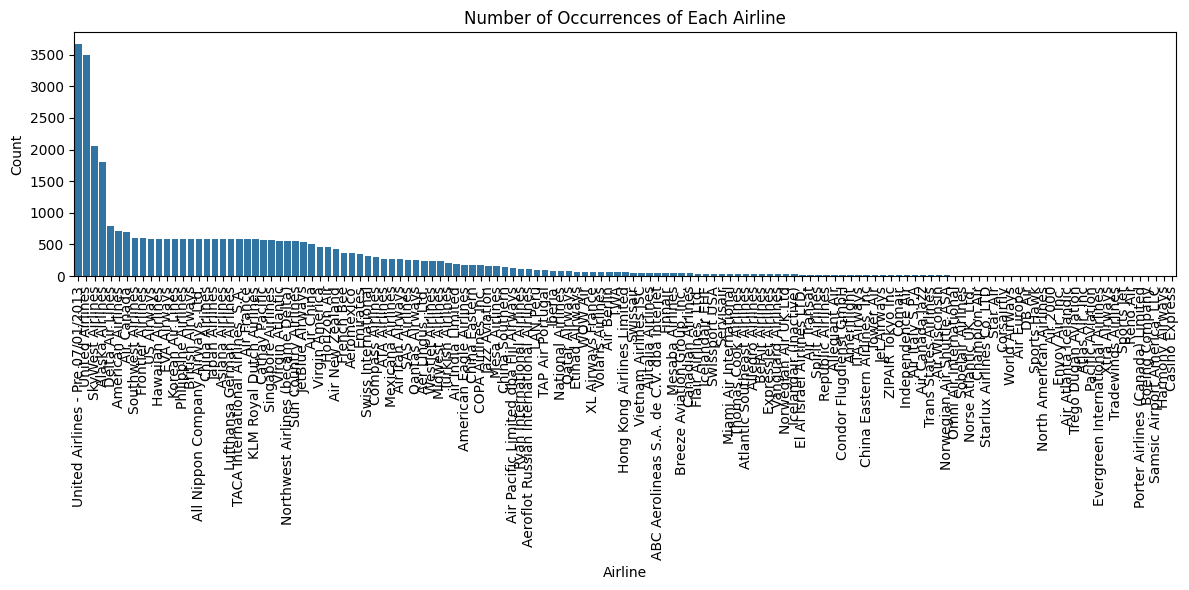

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data/Air_Traffic_Passenger_Statistics_20240408.csv')

# Count occurrences of each airline
airline_counts = data['Operating Airline'].value_counts()

# Plot the counts of airlines
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Operating Airline', order=airline_counts.index)
plt.title('Number of Occurrences of Each Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


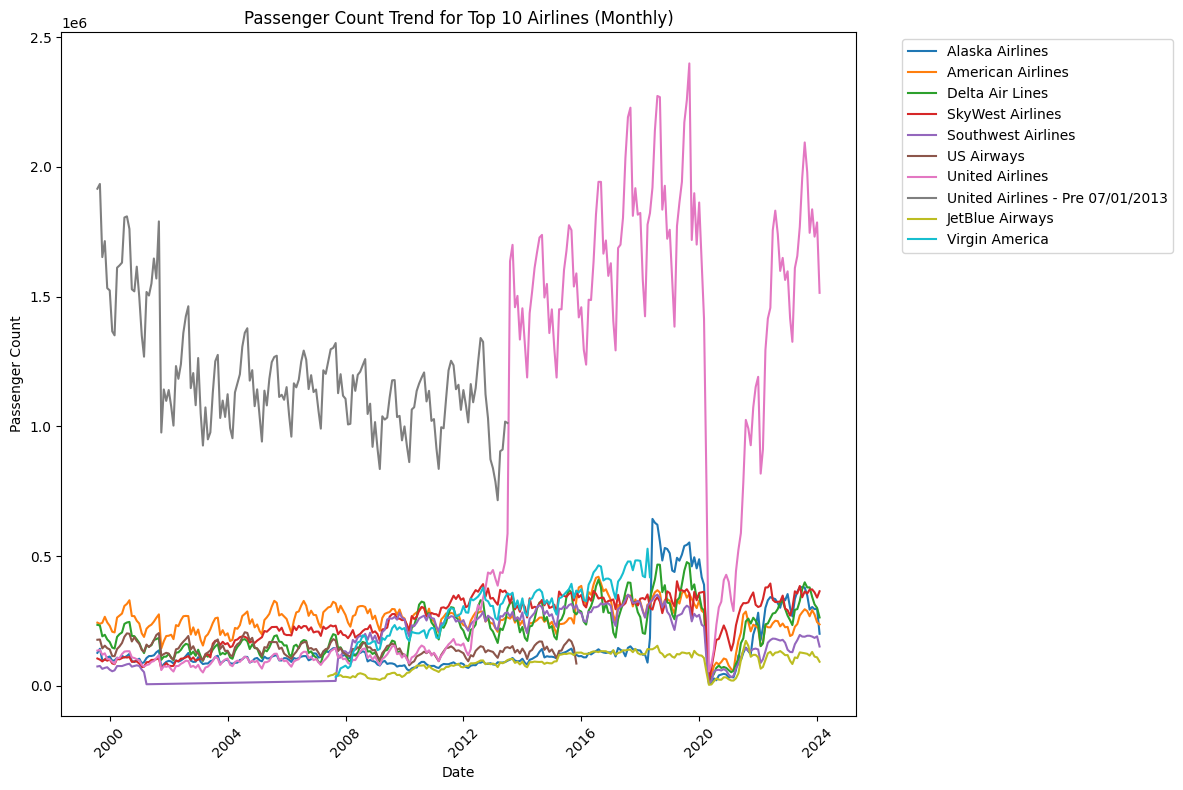

In [14]:
# Sum passenger counts for each airline
total_passenger_counts = airline_data.groupby('Operating Airline')['Passenger Count'].sum()

# Get the top 10 airlines with the most passenger counts
top_10_airlines = total_passenger_counts.nlargest(10).index

# Filter the data to include only the top 10 airlines
filtered_airline_passenger_counts = airline_passenger_counts[airline_passenger_counts['Operating Airline'].isin(top_10_airlines)]

# Line chart showing passenger count trend for each of the top 10 airlines every month
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_airline_passenger_counts, x='Activity Period Start Date', y='Passenger Count', hue='Operating Airline')
plt.title('Passenger Count Trend for Top 10 Airlines (Monthly)')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
from bokeh.palettes import Category20
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource
from bokeh.models import Legend
from bokeh.layouts import row
from bokeh.models import FuncTickFormatter

from bokeh.io import output_file

# Specify the output file
output_file("C:/Users/nerea/OneDrive/Documentos/MASTER DTU/SocialData_Spring24/FinalProject/FinalProject---SocialData24.github.io/posts/images/airline_passenger_counts.html")


output_notebook()

# Create a new plot with a title and axis labels
p = figure(title="Passenger Count Trend for Top 10 Airlines (Monthly)", x_axis_label='Date', y_axis_label='Passenger Count (in millions)', x_axis_type='datetime', width =800, height=400)

# Create an empty legend
legend_it = []

# Add a line renderer with legend for each airline in the top 10
for i, airline in enumerate(top_10_airlines):
    df = filtered_airline_passenger_counts[filtered_airline_passenger_counts['Operating Airline'] == airline]
    df['Month'] = df['Activity Period Start Date'].dt.strftime('%B')  # Add a 'Month' column
    source = ColumnDataSource(df)
    c = p.line(x='Activity Period Start Date', y='Passenger Count', line_width=2, source=source, color=Category20[10][i])
    legend_it.append((airline, [c]))

# Add a hover tool
hover = HoverTool(tooltips=[('Airline', '@{Operating Airline}'), ('Passenger Count', '@{Passenger Count}{0,0}'), ('Month', '@Month')])
p.add_tools(hover)

# Add the legend
legend = Legend(items=legend_it, location=(10, -30))
legend.click_policy="hide"
p.add_layout(legend, 'right')

# Format the y-axis to display values in millions
p.yaxis.formatter = FuncTickFormatter(code="""
    return tick / 1e6 + "M"
""")

# Show the plot
show(p)

Loading BokehJS ...

C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\1265573252.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Activity Period Start Date'].dt.strftime('%B')  # Add a 'Month' column
C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\1265573252.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Activity Period Start Date'].dt.strftime('%B')  # Add a 'Month' column
C:\Users\nerea\AppData\Local\Temp\ipykernel_11088\1265573252.py:27: SettingWithCopyWarning: 
A value is tr